In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("/content/Iris.csv")

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.shape

(150, 6)

In [5]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


UNIVARIATE ANALYSIS OF INPUT FEATURES

UNIVARIATE ANALYSIS OF SepalLengthCm

<Axes: >

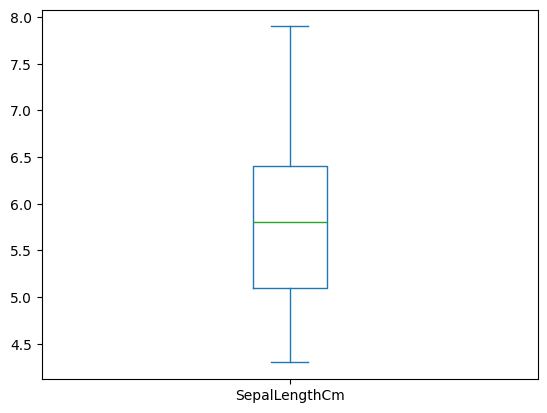

In [6]:
df['SepalLengthCm'].plot(kind='box')

<Axes: ylabel='Density'>

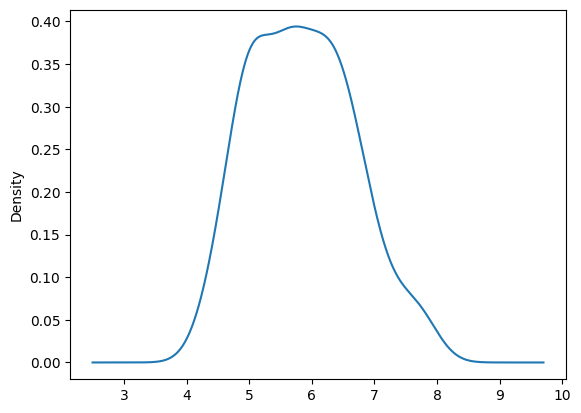

In [7]:
df['SepalLengthCm'].plot(kind='kde')

In [8]:
df['SepalLengthCm'].skew()

np.float64(0.3149109566369728)

UNIVARIATE ANALYSIS OF SepalWidthCm

<Axes: >

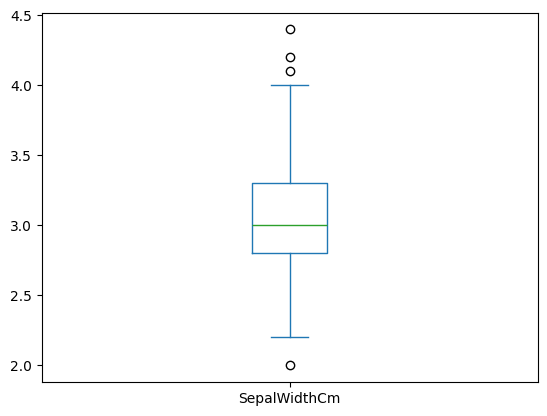

In [9]:
df['SepalWidthCm'].plot(kind='box')
# these outliers are biological variations and hence, are to be taken into consideration for model building

<Axes: ylabel='Density'>

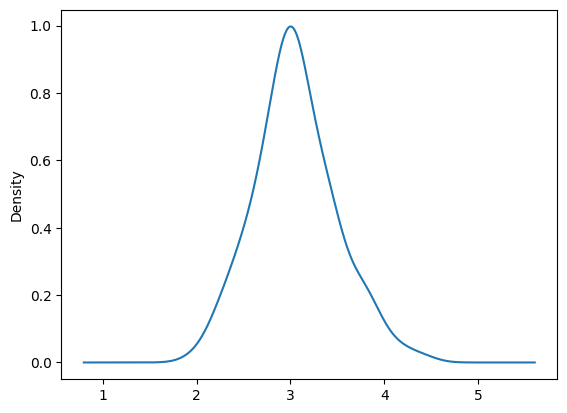

In [10]:
df['SepalWidthCm'].plot(kind='kde')

In [11]:
df['SepalWidthCm'].skew()

np.float64(0.3340526621720866)

UNIVARIATE ANALYSIS OF PetalLengthCm

<Axes: >

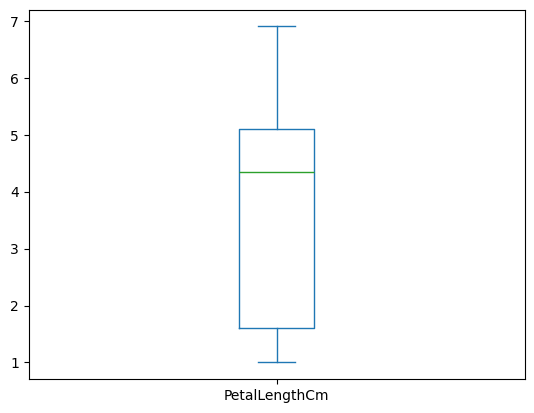

In [12]:
df['PetalLengthCm'].plot(kind='box')

<Axes: ylabel='Density'>

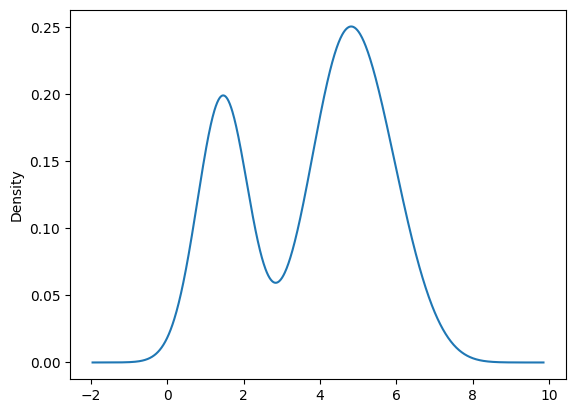

In [13]:
df['PetalLengthCm'].plot(kind='kde')

In [14]:
df['PetalLengthCm'].skew()

np.float64(-0.27446425247378287)

UNIVARIATE ANALYSIS OF PetalWidthCm


<Axes: >

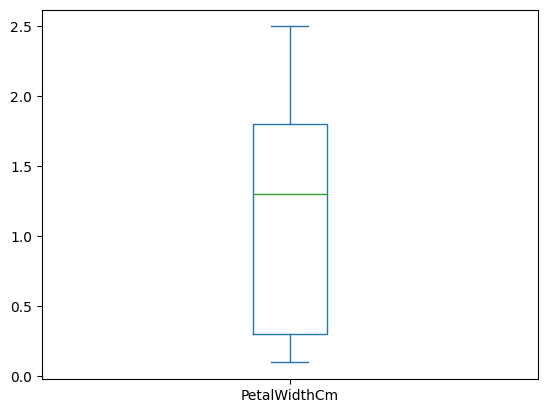

In [15]:
df['PetalWidthCm'].plot(kind='box')

<Axes: ylabel='Density'>

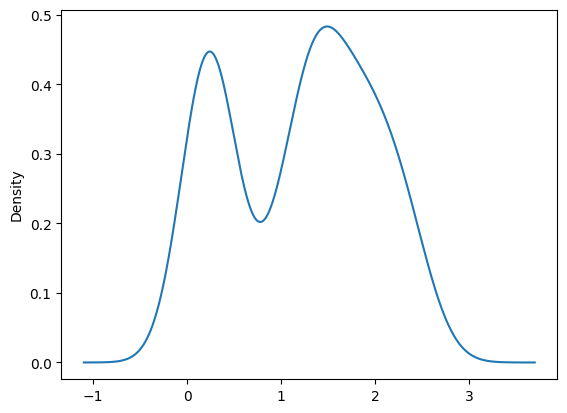

In [16]:
df['PetalWidthCm'].plot(kind='kde')

In [17]:
df['PetalWidthCm'].skew()

np.float64(-0.10499656214412734)

X AND Y


In [18]:
X = df.drop(columns=['Id','Species'])

In [19]:
X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [20]:
Y = df['Species']

In [21]:
Y

,Species
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa
...,...
145,Iris-virginica
146,Iris-virginica
147,Iris-virginica
148,Iris-virginica


MODEL BUILDING

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [26]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [27]:
le = LabelEncoder()
Y_label = le.fit_transform(Y)

In [33]:
import torch
import torch.nn as nn
import torch.optim as optim

In [59]:
X_tensor = torch.tensor(X_scaled,dtype=torch.float32)
Y_tensor = torch.tensor(Y_label,dtype=torch.long)

In [60]:
X_train_tensor,X_test_tensor,Y_train_tensor,Y_test_tensor=train_test_split(X_tensor,Y_tensor,test_size=0.2,random_state=42)

In [61]:
class SoftMaxRegression(nn.Module):
  def __init__(self,in_features,out_features):
    super().__init__()
    self.layer = nn.Linear(in_features,out_features)
  def forward(self,X_train_tensor):
    return self.layer(X_train_tensor)

In [62]:
model=SoftMaxRegression(in_features=4, out_features=3) # as the number of classes=3
print(model)

SoftMaxRegression(
  (layer): Linear(in_features=4, out_features=3, bias=True)
)


In [65]:
learning_rate=0.01
optimizer=optim.Adam(model.parameters(),lr=learning_rate)
criterion=nn.CrossEntropyLoss()

In [66]:
epochs=500
for epoch in range(epochs):
  y_hat = model(X_train_tensor)
  loss=criterion(y_hat,Y_train_tensor)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  if (epoch%100==0):
    print(f"epoch {epoch}, loss {loss}")
print(f"epoch 500, loss {loss}")

epoch 0, loss 1.029910683631897
epoch 100, loss 0.3323553502559662
epoch 200, loss 0.22897984087467194
epoch 300, loss 0.17533916234970093
epoch 400, loss 0.14387930929660797
epoch 500, loss 0.12376917153596878


In [70]:
model.eval()
with torch.no_grad():
  output=model(X_test_tensor)
  _, prediction = torch.max(output,1)
  correct_prediction = (prediction==Y_test_tensor).sum().item()
  total = Y_test_tensor.size(0)
  accuracy = correct_prediction/total
  loss=criterion(output,Y_test_tensor)
  print(f"The loss on test data is {loss}")
  print(f"The accuracy on the test data is {accuracy}")

The loss on test data is 0.106260746717453
The accuracy on the test data is 0.9666666666666667


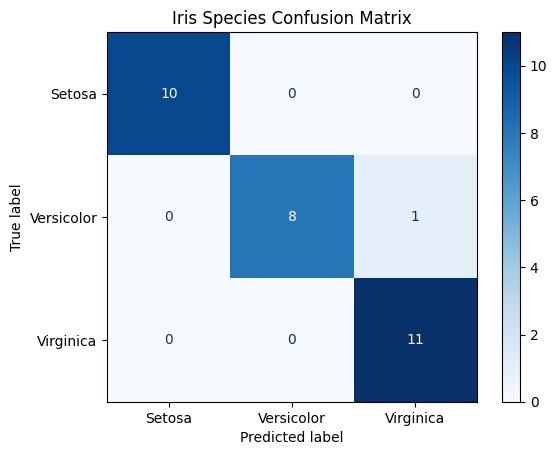

In [71]:
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix

cm = confusion_matrix(Y_test_tensor.numpy(), prediction.numpy())
display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Setosa','Versicolor','Virginica'])
display.plot(cmap=plt.cm.Blues)
plt.title('Iris Species Confusion Matrix')
plt.show()